In [ ]:
import sys; sys.path.append("..")
from dataset import AppleQualityDataset, Library
from pomegranate.bayesian_network import BayesianNetwork
import matplotlib.pyplot as plt

data = AppleQualityDataset(data_path="../data/apple_quality.csv", seed=42)

In [2]:
display(data.train_df.head())
display(data.test_df.head())

train_data = data.train_df.to_numpy()

,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
3012,0,1,1,0,0,2,1,0
1436,1,0,0,1,2,2,0,0
96,1,0,0,0,2,2,0,0
43,2,2,1,1,0,0,1,0
1814,0,2,0,1,0,2,2,0


,size,weight,sweetness,crunchiness,juiciness,ripeness,acidity,quality
555,2,0,0,1,1,2,1,1
3491,2,2,1,1,1,0,2,0
527,2,1,2,1,0,0,2,0
3925,0,1,2,0,0,2,1,1
2989,0,1,0,0,0,2,0,0


# Manually defined
---

{'accuracy': 0.701, 'precision_macro': 0.7039185054475401, 'accuracy_macro': 0.7015601560156015, 'f1_macro': 0.7002803731759956}


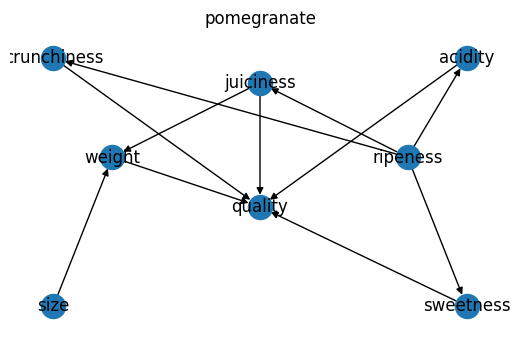

In [3]:
model = BayesianNetwork(structure=[(), (0, 4), (5,), (5,), (5,), (), (5,), (1, 2, 3, 4, 6)])
model.fit(train_data)

print(data.evaluate(model, Library.POMEGRANATE))

plt.figure(figsize=(5, 3))
data.plot(model, Library.POMEGRANATE)
plt.show()

# Constraint-based
---

## A*

{'accuracy': 0.773, 'precision_macro': 0.7785128071518133, 'accuracy_macro': 0.7736873687368737, 'f1_macro': 0.7721521782552879}


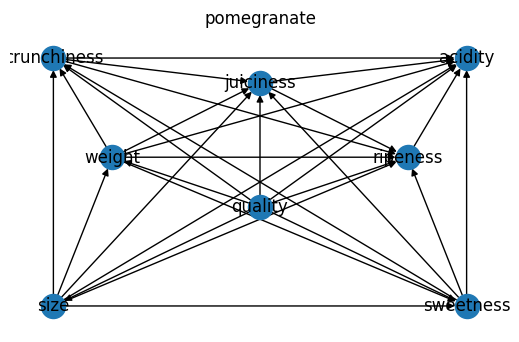

In [4]:
model = BayesianNetwork(algorithm="exact")
model.fit(train_data)

print(data.evaluate(model, Library.POMEGRANATE))

plt.figure(figsize=(5, 3))
data.plot(model, Library.POMEGRANATE)
plt.show()

# Score-based
---

## Chow-Liu

{'accuracy': 0.715, 'precision_macro': 0.7150038422131147, 'accuracy_macro': 0.7149014901490149, 'f1_macro': 0.7149176111896338}


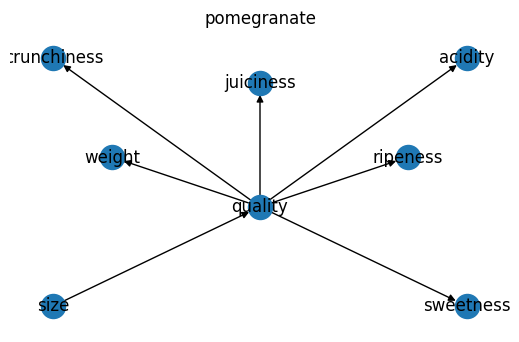

In [5]:
model = BayesianNetwork(algorithm="chow-liu")
model = model.fit(train_data)

print(data.evaluate(model, Library.POMEGRANATE))

plt.figure(figsize=(5, 3))
data.plot(model, Library.POMEGRANATE)
plt.show()